# LSTM - Temp

## Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/data_imputed_2.csv")

In [3]:
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,01/02/2022 0:00,12.6,Gujrāt,PK,385,1339.8,76.0,10.7,491.7,347.67,238.0
1,01/02/2022 1:00,11.5,Gujrāt,PK,404,1437.6,76.0,9.3,508.3,359.33,268.0
2,01/02/2022 2:00,11.9,Gujrāt,PK,421,1535.5,76.0,8.0,525.0,371.00,298.0
3,01/02/2022 3:00,12.2,Gujrāt,PK,425,1659.0,68.3,5.3,529.3,374.00,275.7
4,01/02/2022 4:00,11.9,Gujrāt,PK,430,1782.5,60.7,2.7,533.7,377.00,253.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19706 entries, 0 to 19705
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_local  19706 non-null  object 
 1   temp             19706 non-null  float64
 2   city_name        19706 non-null  object 
 3   country_code     19706 non-null  object 
 4   aqi              19706 non-null  int64  
 5   co               19706 non-null  float64
 6   no2              19706 non-null  float64
 7   o3               19706 non-null  float64
 8   pm10             19706 non-null  float64
 9   pm25             19706 non-null  float64
 10  so2              19706 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
data = df[['temp']]

## Data PreProcessing

In [6]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [7]:
dataset = data
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [8]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [9]:
# converting the dataset as supervised learning
reframed = series_to_supervised(scaled, 168, 168)
print(reframed.shape)

(19371, 336)


In [10]:
reframed.head()

,var1(t-168),var1(t-167),var1(t-166),var1(t-165),var1(t-164),var1(t-163),var1(t-162),var1(t-161),var1(t-160),var1(t-159),...,var1(t+158),var1(t+159),var1(t+160),var1(t+161),var1(t+162),var1(t+163),var1(t+164),var1(t+165),var1(t+166),var1(t+167)
168,0.221709,0.196305,0.205543,0.212471,0.205543,0.196305,0.170901,0.152425,0.170901,0.187067,...,0.452656,0.452656,0.452656,0.452656,0.452656,0.392610,0.367206,0.316397,0.272517,0.263279
169,0.196305,0.205543,0.212471,0.205543,0.196305,0.170901,0.152425,0.170901,0.187067,0.290993,...,0.452656,0.452656,0.452656,0.452656,0.392610,0.367206,0.316397,0.272517,0.263279,0.256351
170,0.205543,0.212471,0.205543,0.196305,0.170901,0.152425,0.170901,0.187067,0.290993,0.323326,...,0.452656,0.452656,0.452656,0.392610,0.367206,0.316397,0.272517,0.263279,0.256351,0.221709
171,0.212471,0.205543,0.196305,0.170901,0.152425,0.170901,0.187067,0.290993,0.323326,0.348730,...,0.452656,0.452656,0.392610,0.367206,0.316397,0.272517,0.263279,0.256351,0.221709,0.221709
172,0.205543,0.196305,0.170901,0.152425,0.170901,0.187067,0.290993,0.323326,0.348730,0.401848,...,0.452656,0.392610,0.367206,0.316397,0.272517,0.263279,0.256351,0.221709,0.221709,0.205543


In [11]:
reframed.columns

Index(['var1(t-168)', 'var1(t-167)', 'var1(t-166)', 'var1(t-165)',
       'var1(t-164)', 'var1(t-163)', 'var1(t-162)', 'var1(t-161)',
       'var1(t-160)', 'var1(t-159)',
       ...
       'var1(t+158)', 'var1(t+159)', 'var1(t+160)', 'var1(t+161)',
       'var1(t+162)', 'var1(t+163)', 'var1(t+164)', 'var1(t+165)',
       'var1(t+166)', 'var1(t+167)'],
      dtype='object', length=336)

In [12]:
values = reframed.values

# We train the model on the 1st 1 and a half years of data and then test on the remaining 
n_train_hours = int(365 * 24 * 1.5)

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(13140, 1, 335) (13140,) (6231, 1, 335) (6231,)


In [13]:
train.shape, test.shape, values.shape

((13140, 336), (6231, 336), (19371, 336))

In [48]:
test_X[-168:].shape

(168, 1, 335)

## Model Fitting

### Model 1

In [14]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [15]:
import matplotlib.pyplot as plt

In [69]:
train_X.shape

(13140, 1, 335)

In [75]:
import numpy as np

In [76]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [82]:
# choose a number of time steps
n_steps_in, n_steps_out = 168, 168
# split into samples
X, y = split_sequence(data, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

In [83]:
X.shape

(0,)

In [84]:
data

array([[[0.4618938 , 0.4618938 , 0.4618938 , ..., 0.55427253,
         0.48729795, 0.48729795]],

       [[0.4618938 , 0.4618938 , 0.4526559 , ..., 0.48729795,
         0.48729795, 0.48729795]],

       [[0.4618938 , 0.4526559 , 0.46882218, ..., 0.48729795,
         0.48729795, 0.46882218]],

       ...,

       [[0.5127021 , 0.49422634, 0.49422634, ..., 0.59815246,
         0.49422634, 0.47806007]],

       [[0.49422634, 0.49422634, 0.46882218, ..., 0.49422634,
         0.47806007, 0.4618938 ]],

       [[0.49422634, 0.46882218, 0.46882218, ..., 0.47806007,
         0.4618938 , 0.41801387]]], dtype=float32)

In [80]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

IndexError: tuple index out of range

In [85]:
model = Sequential()
model.add(Input(shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(64))
model.add(Dense(168))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 64)                  │         102,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 168)                 │          10,920 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,320 (442.66 KB)

 Trainable params: 113,320 (442.66 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50


ValueError: Dimensions must be equal, but are 72 and 168 for '{{node compile_loss/mse/sub}} = Sub[T=DT_FLOAT](data_1, sequential_4_1/dense_6_1/Add)' with input shapes: [72], [72,168].

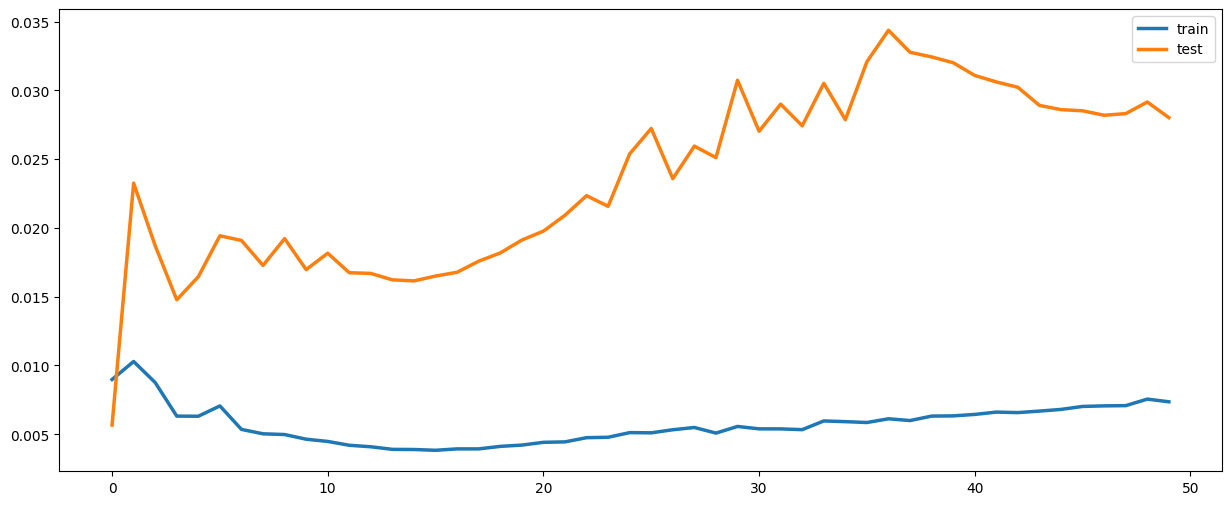

In [18]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [19]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
(6231, 1)
(6231,)


In [20]:
y_test_true = test[:,1]

In [21]:
import numpy as np

In [22]:
poll = np.array(df["temp"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

In [23]:
rmse = np.sqrt(mean_squared_error(test_y, testPredict))
print("Test RMSE ="  ,rmse)

Test RMSE = 27.221455


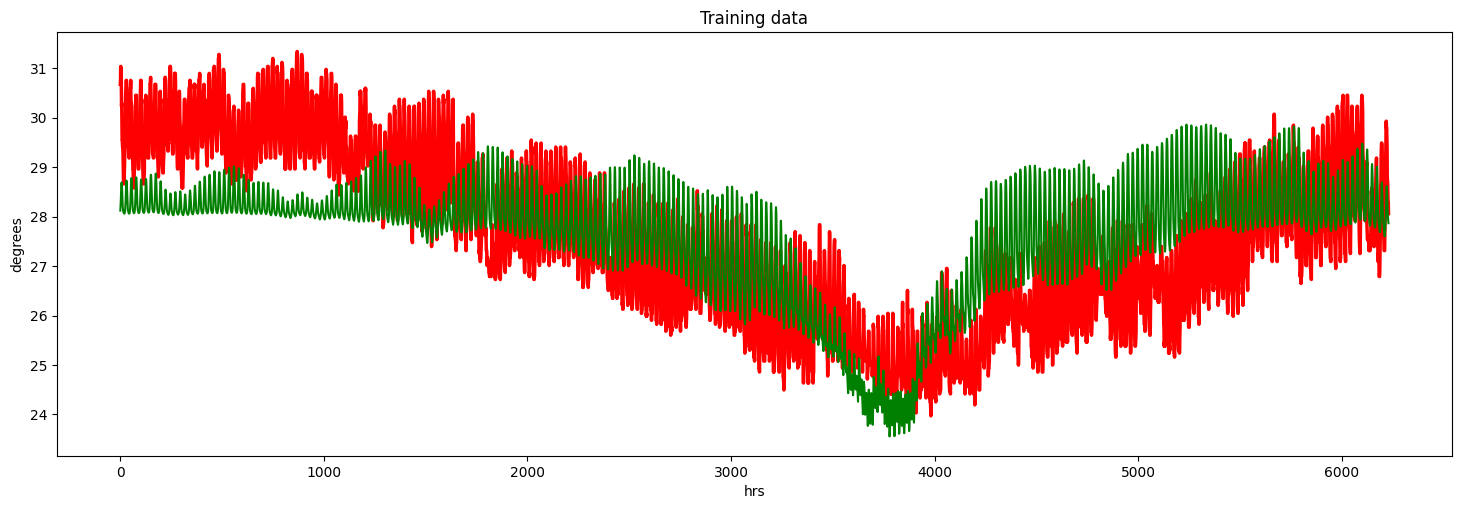

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,5.5))
plt.ylabel("degrees")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "red", linewidth = 2.5)
plt.plot(testPredict, c = "green")
plt.title("Training data")
plt.show()

### Model 2

In [25]:
model2 = Sequential()
model2.add(Input(shape=(train_X.shape[1], train_X.shape[2])))
model2.add(LSTM(256))
model2.add(Dense(64))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Dense(1))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         606,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 622,977 (2.38 MB)

 Trainable params: 622,849 (2.38 MB)

 Non-trainable params: 128 (512.00 B)

In [26]:
model2.compile(loss='mse', optimizer='adam')

hist2 = model2.fit(train_X, train_y, epochs=50, batch_size=128, validation_data=(test_X, test_y))

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 1.7214 - val_loss: 0.0118
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4527 - val_loss: 0.0582
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1898 - val_loss: 0.0420
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1183 - val_loss: 0.0075
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0793 - val_loss: 0.0174
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0525 - val_loss: 0.0023
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0369 - val_loss: 0.0035
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - val_loss: 0.0035
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0197 - val_loss: 0.0019
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - val_loss: 0.0018
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - val_loss: 0.0021
Epoch 12/50
103/103 ━━━━━━━━━━━━━━━━━━━━

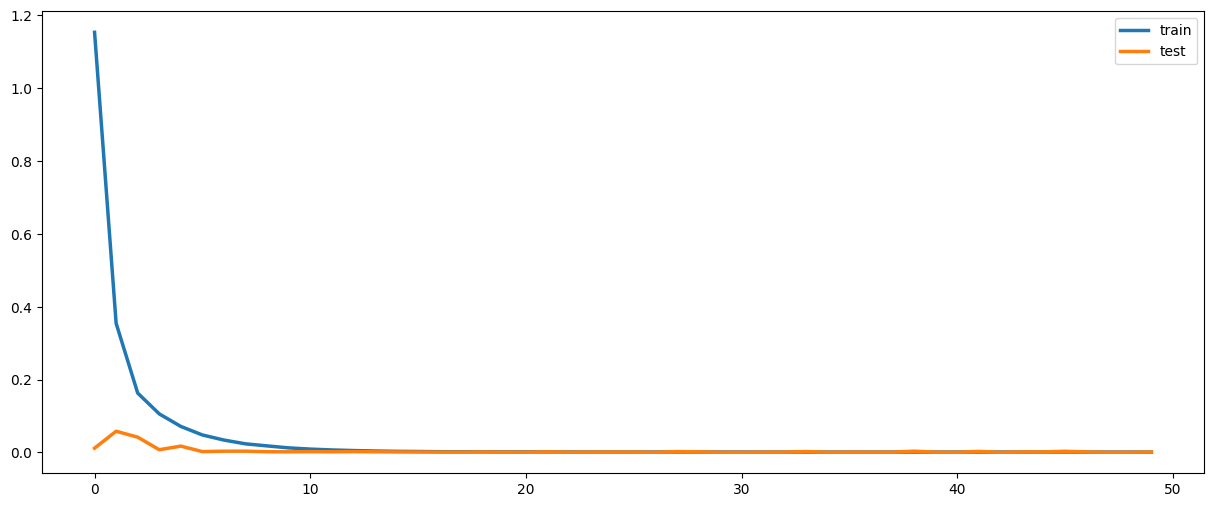

In [27]:
plt.figure(figsize=(15,6))
plt.plot(hist2.history['loss'], label='train', linewidth = 2.5)
plt.plot(hist2.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [28]:
y_test_true = test[:,1]

In [29]:
testPredict2 = model2.predict(test_X)
testPredict2 = testPredict2.ravel()

# Inverse scaling the output, for better visual interpretation 

poll = np.array(df["temp"])
meanop = poll.mean()
stdop = poll.std()

print(meanop, stdop)

y_test_true = y_test_true*stdop + meanop
testPredict2 = testPredict2*stdop + meanop

195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
23.969638688724245 8.723285922487557


In [30]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict2))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 0.8919715


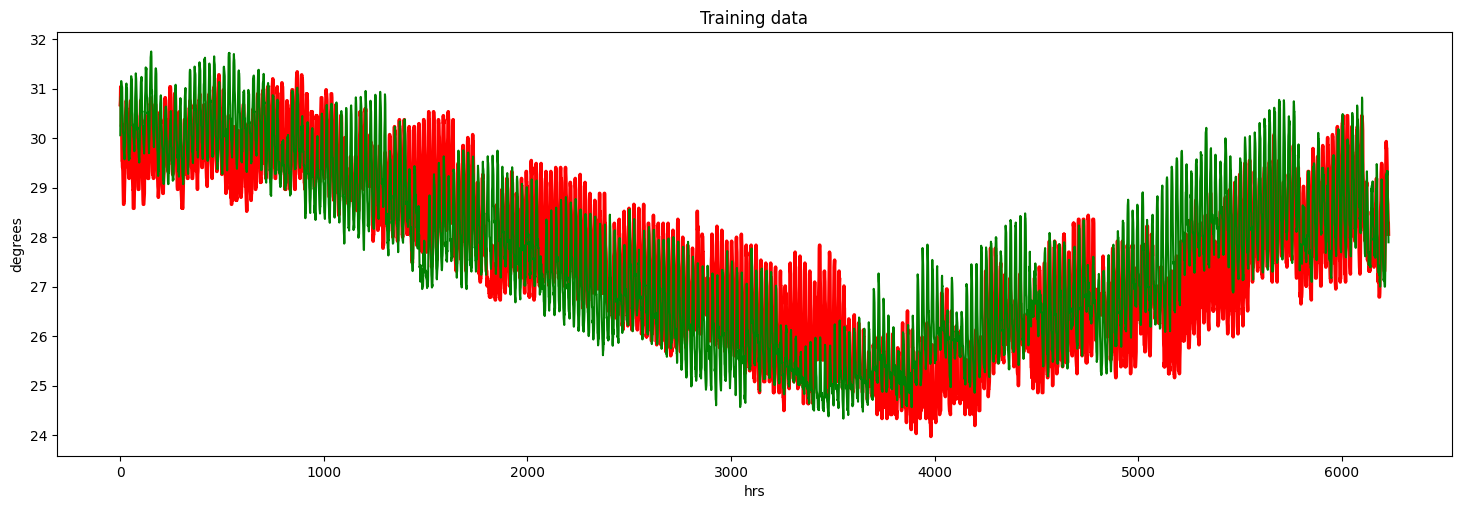

In [31]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,5.5))
plt.ylabel("degrees")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "red", linewidth = 2.5)
plt.plot(testPredict2, c = "green")
plt.title("Training data")
plt.show()

### Model 3

In [32]:
model3 = Sequential()
model3.add(Input(shape=(train_X.shape[1], train_X.shape[2])))
model3.add(LSTM(256))
model3.add(Dense(32))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())
model3.add(Dense(1))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 256)                 │         606,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 614,593 (2.34 MB)

 Trainable params: 614,529 (2.34 MB)

 Non-trainable params: 64 (256.00 B)

In [33]:
model3.compile(loss='mse', optimizer='adam')

hist3 = model3.fit(train_X, train_y, epochs=50, batch_size=256, validation_split=0.2)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 1.6129 - val_loss: 0.8757
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.7729 - val_loss: 0.3103
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.4242 - val_loss: 0.1095
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.2915 - val_loss: 0.0455
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2169 - val_loss: 0.0493
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.1814 - val_loss: 0.0131
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1458 - val_loss: 0.0027
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1186 - val_loss: 0.0027
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0985 - val_loss: 0.0024
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0824 - val_loss: 0.0081
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0688 - val_loss: 0.0180
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.

In [34]:
y_test_true = test[:,1]

In [35]:
testPredict3 = model3.predict(test_X)
testPredict3 = testPredict3.ravel()

# Inverse scaling the output, for better visual interpretation 

poll = np.array(df["temp"])
meanop = poll.mean()
stdop = poll.std()

print(meanop, stdop)

y_test_true = y_test_true*stdop + meanop
testPredict3 = testPredict3*stdop + meanop

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
23.969638688724245 8.723285922487557


In [36]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict3))
print("Training RMSE ="  ,rmse)

Training RMSE = 0.8523684


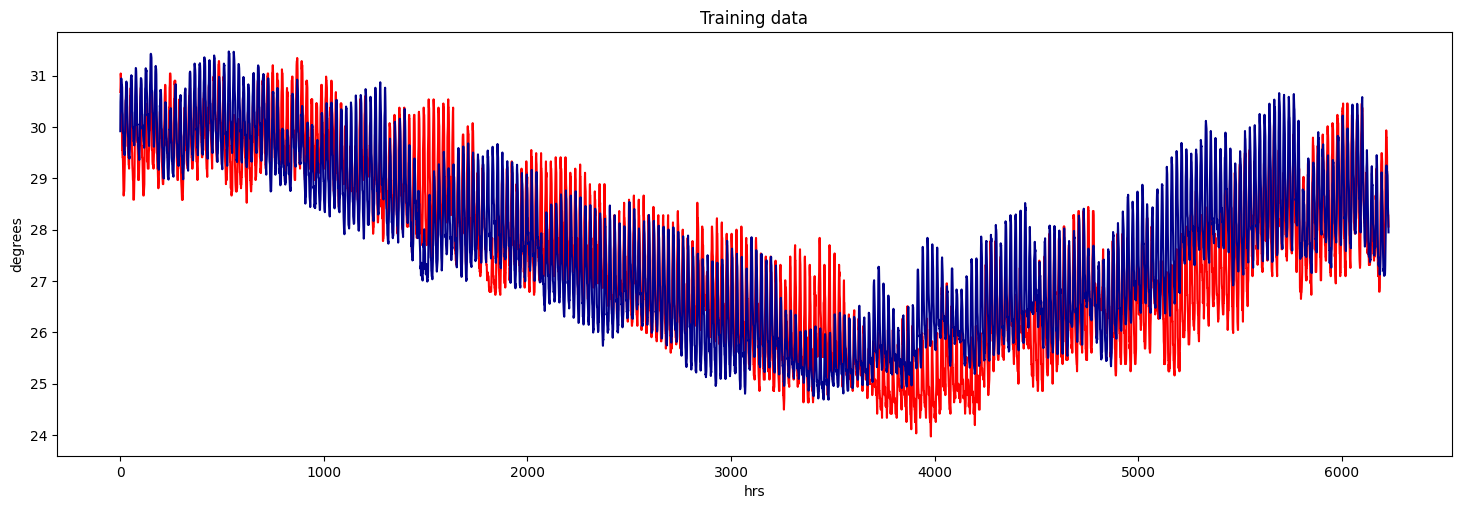

In [37]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,5.5))
# plt.xlim([1000,1250])
plt.ylabel("degrees")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "red")
plt.plot(testPredict3, c = "darkblue")
plt.title("Training data")
plt.show()

## Saving Best Performing Model

In [38]:
model3.save("temp.h5")

In [39]:
model3.save("temp.keras")

## Forecast

In [58]:
# Initialize an array to store forecasted values
forecast_values = []

# Use the last available data point from your dataset as the initial input
last_input = test_X[-1]
# print(last_input)

# Define the number of time steps you want to forecast
# num_steps = 168  # Adjust according to your needs

# for _ in range(num_steps):
#     # Reshape input data for prediction
#     input_data = np.expand_dims(last_input, axis=0)

# Make prediction
forecast = model2.predict(test_X[-168:])

# Inverse transform forecasted value
forecast = forecast.ravel() * stdop + meanop


    # # Store forecasted value
    # forecast_values.append(forecast)

    # # Update input data for the next time step by shifting and appending forecasted value
    # last_input = np.roll(last_input, -1)
    # last_input[-1] = (forecast - meanop) / stdop  # Normalize the forecasted value

# Convert forecast_values to a numpy array
# forecast_values = np.array(forecast_values)

# Print or use forecast_values for further analysis
# print(forecast_values)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [67]:
import numpy as np
from tensorflow.keras.models import load_model

# Load your saved LSTM model
# model = load_model('path_to_your_saved_model.h5')

# Function to forecast future values
def forecast(model, series, window_size, n_steps_ahead):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

    forecast = forecast[-n_steps_ahead:]
    return np.array(forecast).reshape(-1)

# Example data - replace this with your own data
# Assuming 'data' is your univariate time series data
data = test_X[-168:]  # Example data, replace this with your actual data

# Define parameters
window_size = 168  # Sequence length of your LSTM model
n_steps_ahead = 168  # Number of steps ahead to forecast

# Make forecast
forecast_values = forecast(model3, data, window_size, n_steps_ahead)

print("Forecasted values:", forecast_values)

Forecasted values: []
